# Introduction to Futures Contracts
by Maxwell Margenot and Delaney Mackenzie

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)


---


Futures contracts are derivatives and they are fundamentally different from equities, so it is important to understand what they are and how they work. In this lecture we will detail the basic unit of a futures contract, the forward contract, specifics on the valuation of futures contracts, and some things to keep in mind when handling futures. Our goal here is to cover what makes futures tick before we get into performing any sort of statistical analysis of them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Derivatives
We have stated that a futures contract is a derivative, so let's be clear on what a derivative is. A derivative is a financial instrument whose value is dependent on the value of an underlying asset. This can be a complex relationship or it can be something very simple. Derivatives have been constructed for a variety of different purposes in order to make more and more intricate bets about the markets. They provide new ways to express your expectations of how the markets will move and are used to great effect in conjunction with more conventional investments. Large amounts of resources are devoted to the construction and pricing of exotic derivatives, though that is beyond the scope of this lecture.

A futures contract is a standardized version of one of the simplest possible derivatives, the **forward contract**. Let's look at how forward contracts behave to give us a little more background on futures.

## Forward Contracts
A futures contract at its heart is based on a derivative called a forward contract. This is an agreement between two parties to pay a delivery price, $K$, for an asset at some predetermined point in the future. Forward contracts are basic over the counter (OTC) derivatives, typically used for hedging. They are used for neutralizing risk by locking the price for an asset, obligating both sides of the contract to follow through.

Entering into a long position on a forward contract entails agreeing to buy the underlying asset while entering into a short position entails agreeing to sell the underlying. Let's say that the price of the good is denotated by $S_i$, indexed with time, with $T$ being the maturity date of the forward contract. Then the **payoff** of a long position in a forward contract is:

$$ S_T - K $$

And the payoff of a short position in a forward contract is:

$$ K - S_T$$

Where $S_T$ is the value of the underlying at maturity and $K$ is the value agreed upon for the underlying at maturity. The specific value of $K$ is negotiated between the parties entering into a forward contract together so it can vary quite a bit, depending on the relevant parties.

The payoff of a derivative is simply the realized cash value at the end of its life. This settlement can take place with either the delivery and exchange of actual goods or a simple cash settlement. As we can see in the following graphs, a forward contract has a linear payoff.

In [2]:
# K is the delivery price agreed upon in the contract
K = 50
# Here we look at various different values that S_T can have
S_T = np.linspace(0, 100, 200)
# Calculate the long and short payoffs
long_payoff = S_T - K
short_payoff = K - S_T

This is the long side payoff:

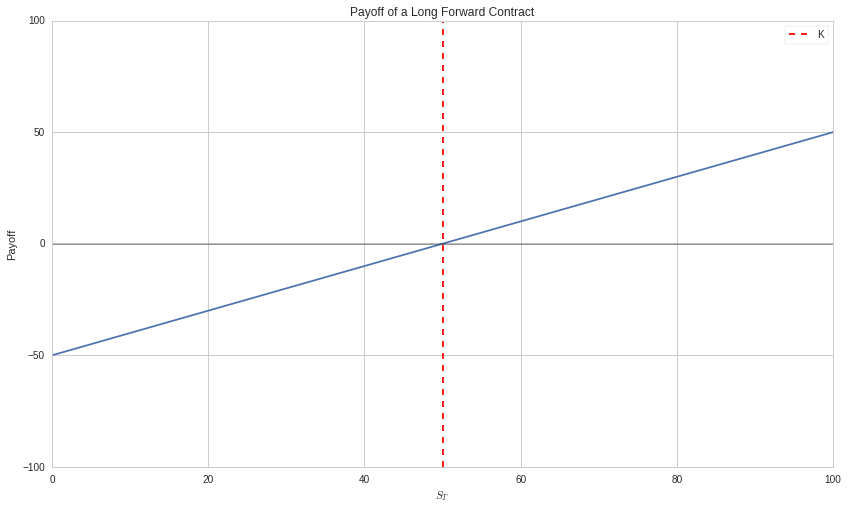

In [3]:
plt.plot(S_T, long_payoff)
plt.axhline(0, color='black', alpha=0.3)
plt.axvline(0, color='black', alpha=0.3)
plt.xlim(0, 100)
plt.ylim(-100, 100)
plt.axvline(K, linestyle='dashed', color='r', label='K')
plt.ylabel('Payoff')
plt.xlabel('$S_T$')
plt.title('Payoff of a Long Forward Contract')
plt.legend();

And this is the short side payoff:

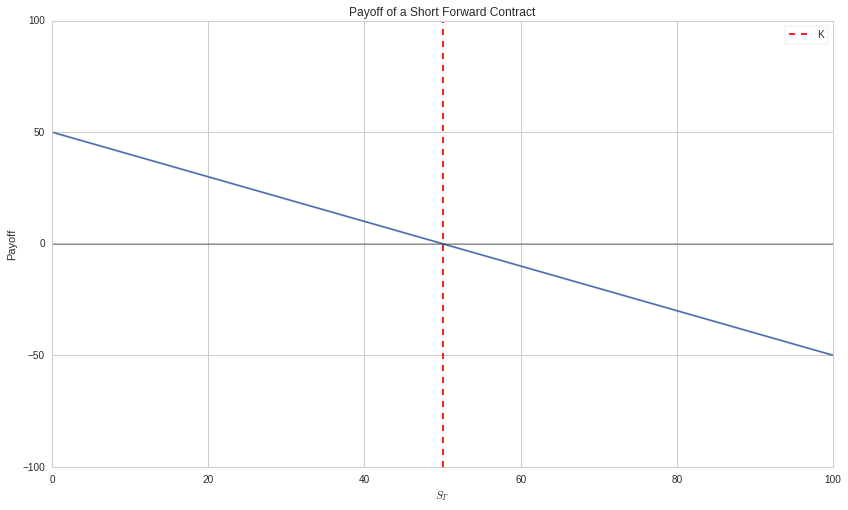

In [4]:
plt.plot(S_T, short_payoff);
plt.axhline(0, color='black', alpha=0.3)
plt.axvline(0, color='black', alpha=0.3)
plt.xlim(0, 100)
plt.ylim(-100, 100)
plt.axvline(K, linestyle='dashed', color='r', label='K')
plt.ylabel('Payoff')
plt.xlabel('$S_T$')
plt.title('Payoff of a Short Forward Contract')
plt.legend();

For a long position on a forward contract, you benefit if the price at expiry is greater than the delivery price, while the opposite holds with a short position. However, even if you do not make a profit on your position there can be advantages. A forward contract locks in a price for a transaction, removing any uncertainty that you may have about a sale or purchase in the future. This is advantageous in cases where you know what you will need at some point in the future (or have a good idea of what you will need due to your models).

Hedging with a forward contract serves to help remove any sort of uncertainty about the price that you will pay (or be paid) for a good. If you are a producer, you can easily protect yourself against falling prices by using a short position in a forward contract with a delivery price that you find amenable. Similarly, if you are a buyer, you can easily protect yourself with a long position.

Say that you need a certain quantity of copper for circuit board production in May. You could wait until May to purchase the appropriate amount, but you will be at the mercy of the **spot market**, the market where assets are traded for immediate delivery. Depending on your risk model and the cost of housing large amounts of copper, it may be more reasonable to enter into a forward contract for delivery in May with a distributor today. This way you are more prepared to meet your production demands.

## Forward Contract Issues
Of course, we seldom know exactly when we will need an asset. In addition, entering into a private agreement with another party exposes you to **counterparty risk**, the risk that one or the other party in a transaction will renege on a deal. How the contract is actually settled is also up to the two parties, whether it be with an exchange of assets or a simple cash reconciliation. Forward contracts leave the delivery date, delivery method, and quantity up for debate. Their OTC nature gives a large degree of customizability, but directly contributes to the aforementioned issues and a lack of liquidity. It is unlikely that another party will be willing to take on an agreement that is highly customized to someone else's terms. There are definitely merits for the various possibilities for hedging that forward contracts provide, however, which is where futures contracts come in.

## How is a Futures Contract Different?
Futures contracts are forward contracts that have been standardized for trade on an exchange. A single futures contract is for a set amount of the underlying with agreed-upon settlement, delivery date, and terms. On top of this, the exchange acts as an intermediary, virtually eliminating counterparty risk. However, this isn't to say that all futures contracts are standardized across the entire futures market. Futures for a given asset are standardized, so the terms of corn futures may differ from the terms of pork bellies futures. 

Another quirk of futures contracts is that they are settled daily with a margin account at a broker held by the holder of the futures contract. Each day, the change in price of the underlying is reflected in an increase or a decrease in the amount of money in the margin account. This process is called "marking to market".

### Marking to Market and Margin Accounts
DISCLAIMER: Margin is not currently modeled automatically on Quantopian. You should restrict your total position allocations manually.

Entering into a futures trade entails putting up a certain amount of cash. This amount will vary depending on the terms of the contract and is called your initial margin. This cash goes into a margin account held with the broker you are doing your trading with. Each day, the value of the futures contract position is marked to market. This means that any change in the futures price over the course of the day is reflected by a change in the margin account balance proportional to the number of contracts that you hold positions in.

You can withdraw any excess in the account over the initial margin if you so choose, but it is important to be mindful of keeping cash available to the broker, above the line of the **maintenance margin**. The maintenance margin is again determined by the terms of the contract.  If the balance in your margin account falls below the maintenance margin, the broker will issue a **margin call**. To comply, you must top up the account with cash up to the initial margin again. If you choose not to or fail to meet the margin call, your position in the contract is closed.

### Example: Corn Futures
Let's say that we want to get **five** corn futures contracts. Each corn contract is standardized for $5000$ bushels of corn (Around $127$ metric tons!) and corn is quoted in cents per bushel. Let's also say that our initial margin is $\$990$ per contract when we enter a position and our maintenance margin is $\$900$ per contract.

We can look at how this example would play out with actual numbers. Let's pull a small section of pricing data for a corn contract and imagine that we entered into a position and held it until maturity.

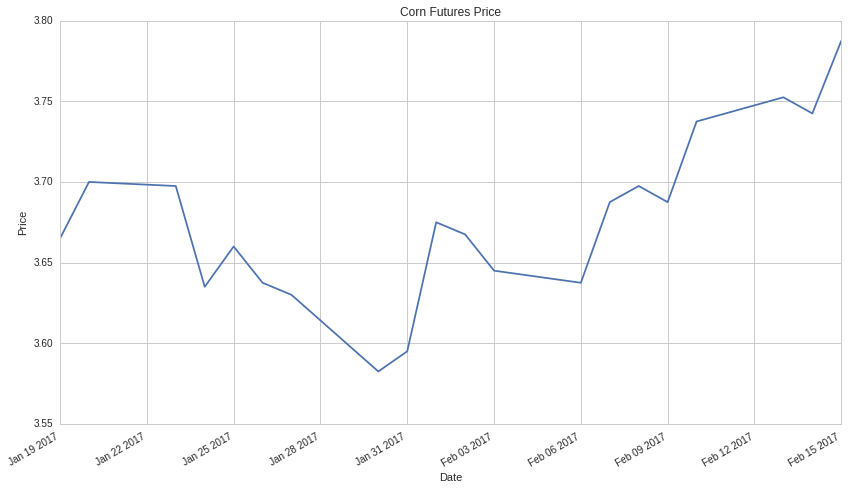

In [5]:
contract = symbols('CNH17')
futures_position_value = get_pricing(contract, start_date = '2017-01-19', end_date = '2017-02-15', fields = 'price')
futures_position_value.name = futures_position_value.name.symbol
futures_position_value.plot()
plt.title('Corn Futures Price')
plt.xlabel('Date')
plt.ylabel('Price');

The plot shows some signifiant decreases in price over the chosen time period, which should be reflected by drops in the margin account.

In [6]:
initial_margin = 990
maintenance_margin = 900
contract_count = 5

Here we calculate when a margin call would occur as the futures price and margin account balance change.

In [7]:
# We hit two margin calls over this time period
margin_account_changes = futures_position_value.diff()*contract.multiplier*contract_count
margin_account_changes[0] = initial_margin*contract_count
margin_account_balance = margin_account_changes.cumsum()
margin_account_balance.name = 'Margin Account Balance'
# First margin call
margin_call_idx = np.where(margin_account_balance < maintenance_margin*contract_count)[0][0]
margin_deposit = initial_margin*contract_count - margin_account_balance[margin_call_idx] 
margin_account_balance[margin_call_idx+1:] = margin_account_balance[margin_call_idx+1:] + margin_deposit
# Second margin call
second_margin_call_idx = np.where(margin_account_balance < maintenance_margin*contract_count)[0][1]
second_margin_deposit = initial_margin*contract_count - margin_account_balance[second_margin_call_idx]
margin_account_balance[second_margin_call_idx+1:] = margin_account_balance[second_margin_call_idx+1:] + second_margin_deposit

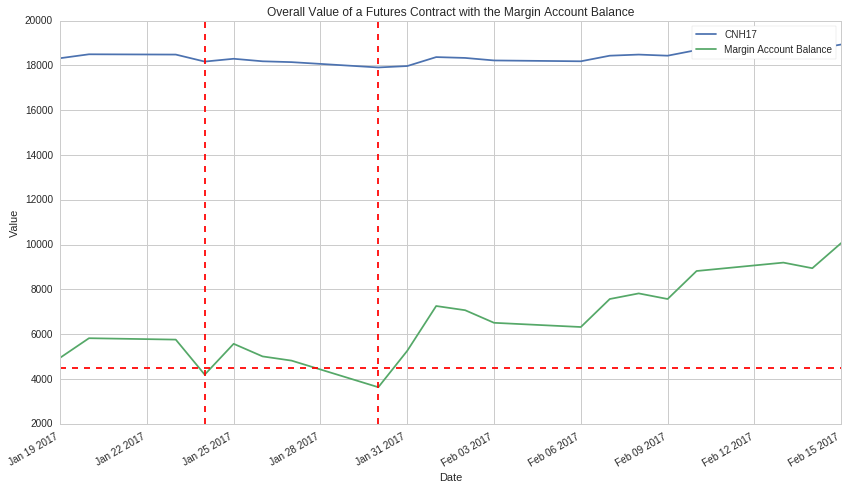

In [8]:
(futures_position_value*contract.multiplier).plot()
margin_account_balance.plot()
plt.axvline(margin_account_balance.index[margin_call_idx], color='r', linestyle='--')
plt.axvline(margin_account_balance.index[second_margin_call_idx], color='r', linestyle='--')
plt.axhline(maintenance_margin*contract_count, color='r', linestyle='--')
plt.title('Overall Value of a Futures Contract with the Margin Account Balance')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend();

The jump in the margin account balance that occurs after each vertical dotted line is the point at which we meet the margin call, increasing the margin account balance to our initial margin once more. Note that the lagged response to the second theoretical margin call in this example is due to a weekend. Notice how a small perturbations in the futures price lead to large changes in the margin account balance. This is a consequence of the inherent leverage.

## Financial vs. Commodity Futures
You can enter into futures contracts on many different types of assets. These range from actual, physical goods such as corn or wheat to more abstract assets, such as some multiplier times a stock market index. Futures contracts based on physical goods are generally called commodity futures, while those based on financial instruments are called financial futures. These can be further broken down into categories based on the general class of commodity or financial instrument.

In general, financial futures are more liquid than commodity futures. Let's compare the volume of two contracts deliverable in March 2017, one on the S&P 500 Index and the other on natural gas.

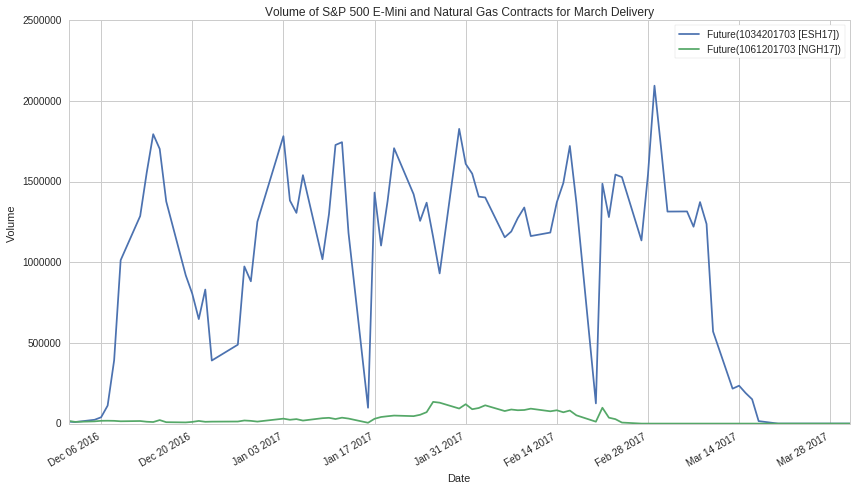

In [9]:
contracts = symbols(['ESH17', 'NGH17'])
volume_comparison = get_pricing(contracts, start_date = '2016-12-01', end_date = '2017-04-01', fields = 'volume')
volume_comparison.plot()
plt.title('Volume of S&P 500 E-Mini and Natural Gas Contracts for March Delivery')
plt.xlabel('Date')
plt.ylabel('Volume');

In [10]:
print volume_comparison.max()

Future(1034201703 [ESH17])    2095150.0
Future(1061201703 [NGH17])     134561.0
dtype: float64


The S&P 500 E-Mini contract has a value based on 50 units of the value of the S&P 500 Index. This financial future has a significant advantage in liquidity compared to natural gas for the same expiry. It likely helps that the S&P 500 E-Mini cash-settled, while the natural gas contract requires arrangements to be made for transportation and storage of fuel, but the main takeaway here is that there are a lot more people trying to trade financial futures.

### Delivery and Naming
Different futures contracts will differ on the available delivery months. Some contracts have delivery every month, while some only have delivery a few times a year. The naming conventions for a given futures contract include the delivery month and year for the specific contract that they refer to. The month codes are standardized and [well-documented](http://www.investopedia.com/terms/d/deliverymonth.asp), but the specific symbol that refers to the underlying varies depending on the broker. For an overview of the contract names that we use on Quantopian, please refer to the [Futures API Introduction](https://www.quantopian.com/posts/futures-data-now-available-in-research).

The delivery terms of a futures contract are listed in the contract specifications for that underlying asset. With commodity futures, this often includes terms for the physical delivery of, for example, 1000 barrels of oil. This will vary between assets. Some contracts, particularly financials, allow for cash settlement, making it easier to deliver.

## Closing a Futures Position
In order to close a futures position, you simply take up an opposite position in the same contract. The broker will see that you have two opposite positions in the same asset so you are flat, effectively closing the account's exposure. As this requires actually being able to open the opposing position, care needs to be taken to do this in a timely manner as futures have varying liquidity as they approach expiry. The majority of volume for a given contract tends to take place during this same period of time, but there is a chance that liquidity may drop and you will be unable to close your futures positions, resulting in you taking delivery.

The delivery date calendar varies from underlying to underlying and from month to month, which means that you have to take proper care to make sure you unwind your positions in a timely manner.

Here we plot the volume of futures contracts on "Light Sweet Crude Oil" with January, February, and March delivery.

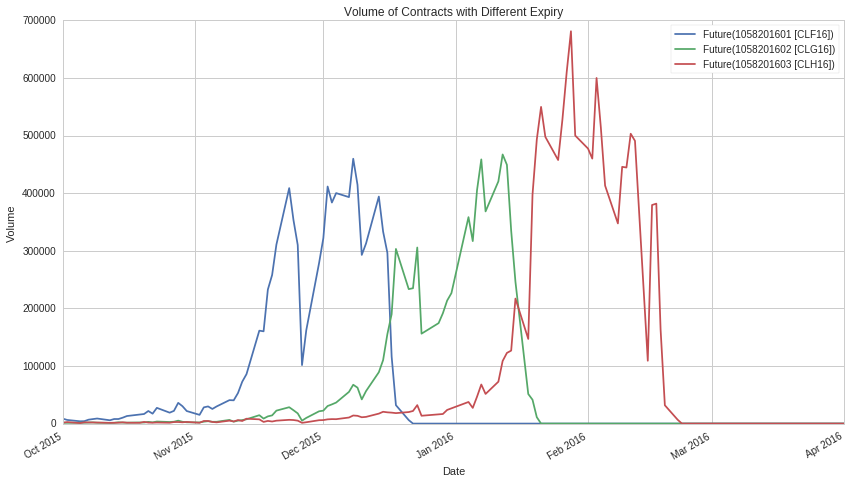

In [11]:
cls = symbols(['CLF16', 'CLG16', 'CLH16'])
contract_volume = get_pricing(cls, start_date='2015-10-01', end_date='2016-04-01', fields='volume')
contract_volume.plot()
plt.title('Volume of Contracts with Different Expiry')
plt.xlabel('Date')
plt.ylabel('Volume');

As one contract fades out of the spotlight, the contract for the next month fades in. It is common practice to **roll over** positions in contracts, closing the previous month's positions and opening up equivalent positions in the next set of contracts. Note that when you create a futures object, you can access the `expiration_date` attribute to see when the contract will stop trading.

In [12]:
cl_january_contract = symbols('CLF16')
print cl_january_contract.expiration_date

2015-12-21 00:00:00+00:00


The expiration date for this crude oil contract is in December, but the delivery does not occur until January. This time lag between expiration and delivery varies for different underlyings. For example, the S&P 500 E-Mini contract, a financial future, has an expiration date in the same month as its delivery.

In [13]:
es_march_contract = symbols('ESH17')
print es_march_contract.expiration_date

2017-03-17 00:00:00+00:00


## Spot Prices and Futures Prices
An important feature of futures markets is that as a contract approaches its expiry, its futures price will converge to the spot price. To show this, we will examine how SPY and a S&P 500 E-Mini contract move against each other. SPY tracks the S&P 500 Index, which is the underlying for the S&P 500 E-Mini contract. If we plot ten times the price of the ETF (the value is scaled down from the actual index), then ideally the difference between them should go to 0 as we approach the expiry of the contract.

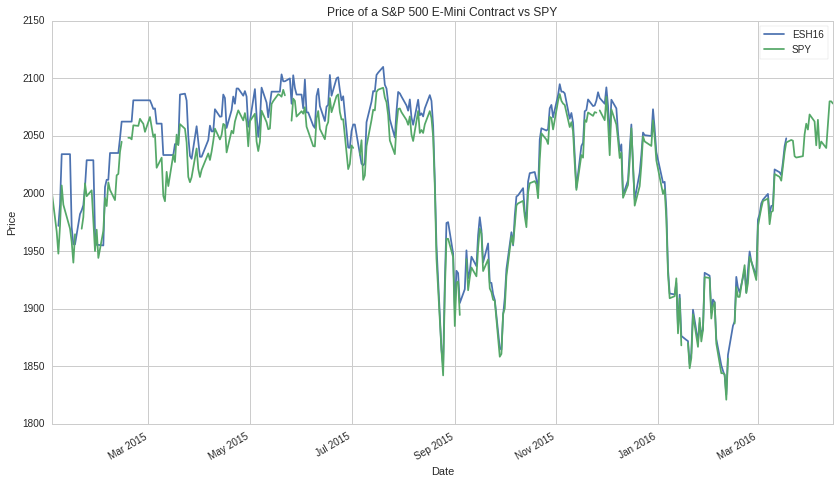

In [14]:
assets = ['SPY', 'ESH16']
prices = get_pricing(assets, start_date = '2015-01-01', end_date = '2016-04-15', fields = 'price')
prices.columns = map(lambda x: x.symbol, prices.columns)
prices['ESH16'].plot()
(10*prices['SPY']).plot()
plt.legend()
plt.title('Price of a S&P 500 E-Mini Contract vs SPY')
plt.xlabel('Date')
plt.ylabel('Price');

Looking at a plot of the prices does not tell us very much, unfortunately. It looks like the values might be getting closer, but we cannot quite tell. Let's look instead at the mean squared error between the ETF and futures prices.

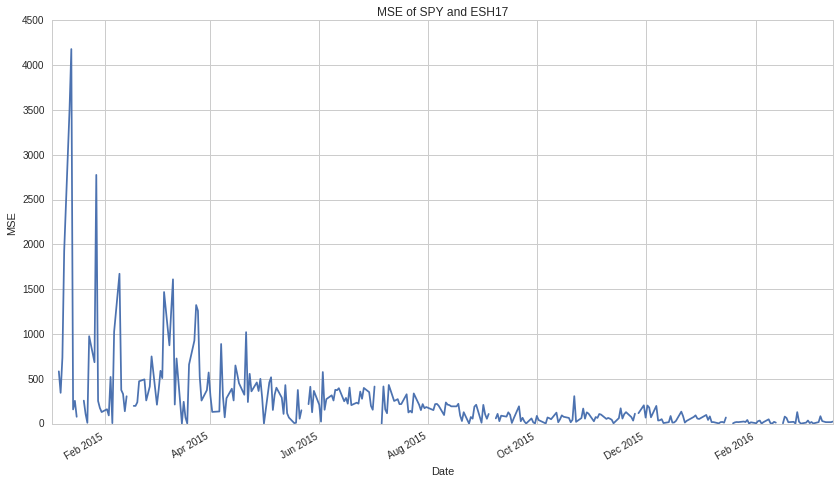

In [15]:
X = (10*prices['SPY'][:'2016-03-15'] - prices['ESH16'][:'2016-03-15'])**2
X.plot()
plt.title('MSE of SPY and ESH17')
plt.xlabel('Date')
plt.ylabel('MSE');

This indeed seems to corroborate the point that futures prices approach the spot at expiry. And this makes sense. If we are close to expiry, there should be little difference between the price of acquiring a commodity or asset now and the price at the expiry date.

### Connection Between Spot and Futures Prices
There are several ways to theoretically model futures prices, just as there are many models to model equity prices. A very basic model of futures prices and spot prices  connects them through a parameter called the **cost of carry**. The cost of carry acts as a discount factor for futures prices, such that

$$ F(t, T) = S(t)\times (1 + c)^{T - t} $$

where $F(t, T)$ is the futures price at time $t$ for maturity $T$, $S(t)$ is the spot price at time $t$, and $c$ is the cost of carry (here assumed to be constant). With continuous compounding, this relationship becomes:

$$ F(t, T) = S(t)e^{c(T - t)} $$

This is a naive representation of the relationship in that it relies on a constant rate as well as a few other factors. Depending on the underlying asset, the cost of carry may be composed of several different things. For example, for a physical commodity, it may incorporate storage costs and the convenience yield for immediate access through the spot market, while for some financial commodities it may only encompass the risk free rate.

The cost of carry on futures can be thought of similarly to dividends on stocks. When considering futures prices of a single underlying through several different maturities, adjustments must be made to account for the cost of carry when switching to a new maturity.

The further out we are from expiry, the more the cost of carry impacts the price. Here is a plot of the prices of contracts on light sweet crude for January, February, March, and April 2017 delivery. The further out the contract is from expiry, the higher the price.

In [16]:
contracts = symbols(['CLF17', 'CLG17', 'CLH17', 'CLJ17'])
prices = get_pricing(contracts, start_date='2016-11-01', end_date='2016-12-15', fields='price')
prices.columns = map(lambda x: x.symbol, prices.columns)

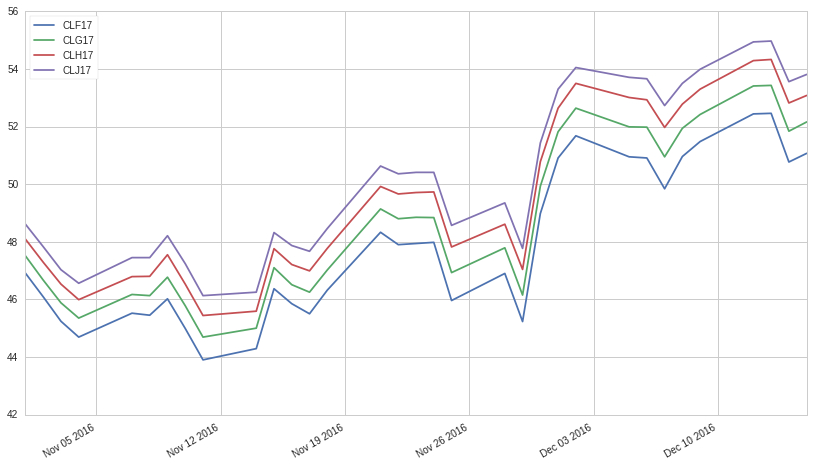

In [17]:
prices.plot();

## Contango and Backwardation
Often in futures markets we expect the futures price to be above the spot price. In this case, we can infer that participants in the market are willing to pay a premium for avoiding storage costs and the like. We call the difference between the futures price and the spot price the basis. A higher futures price than spot price indicates a positive basis, a situation which we call contango. With our cost of carry model, a positive cost of carry indicates contango.

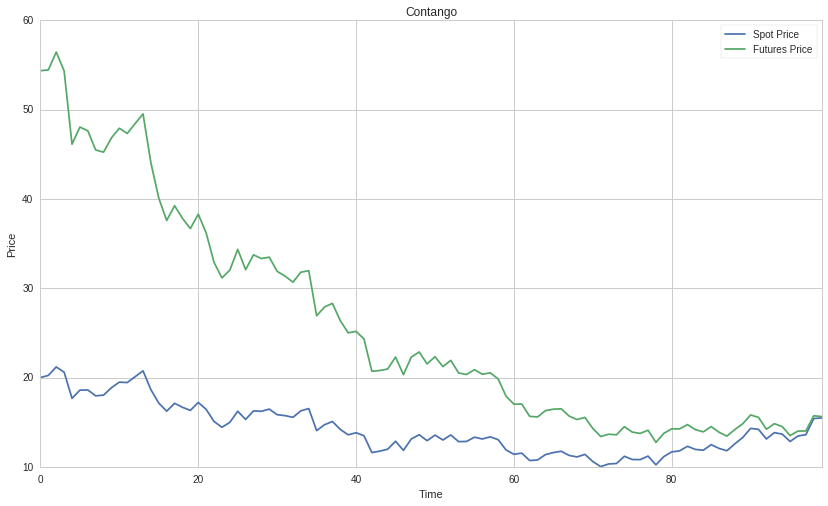

In [18]:
# A toy example to show Contango
N = 100 # Days to expiry of futures contract
cost_of_carry = 0.01
spot_price = pd.Series(np.ones(N), name = "Spot Price")
futures_price = pd.Series(np.ones(N), name = "Futures Price")
spot_price[0] = 20
futures_price[0] = spot_price[0]*np.exp(cost_of_carry*N)
for n in range(1, N): 
    spot_price[n] = spot_price[n-1]*(1 + np.random.normal(0, 0.05))
    futures_price[n] = spot_price[n]*np.exp(cost_of_carry*(N - n))

spot_price.plot()
futures_price.plot()
plt.legend()
plt.title('Contango')
plt.xlabel('Time')
plt.ylabel('Price');

Backwardation occurs when the spot price is above the futures price and we have a negative basis. What this means is that it is cheaper to buy something right now than it would be to lock down for the future. This equates to a negative cost of carry.

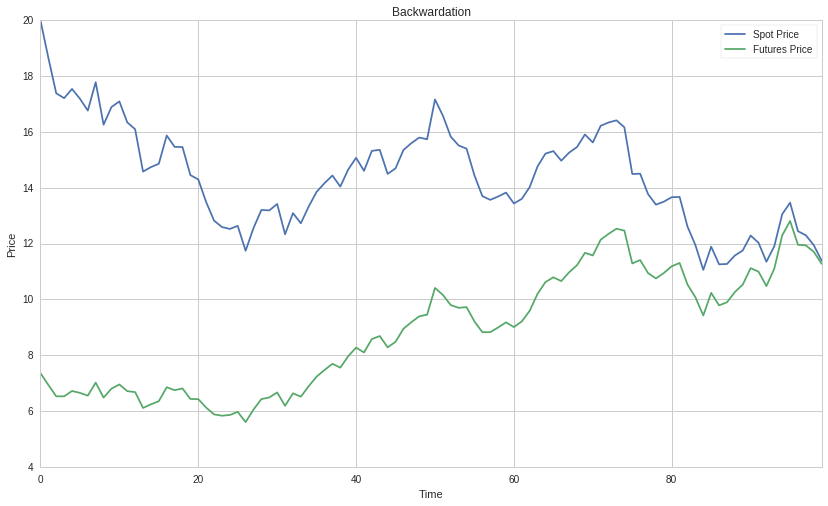

In [19]:
# A toy example to show Backwardation
N = 100 # Days to expiry of futures contract
cost_of_carry = -0.01
spot_price = pd.Series(np.ones(N), name = "Spot Price")
futures_price = pd.Series(np.ones(N), name = "Futures Price")
spot_price[0] = 20
futures_price[0] = spot_price[0]*np.exp(cost_of_carry*N)
for n in range(1, N):
    spot_price[n] = spot_price[n-1]*(1 + np.random.normal(0, 0.05))
    futures_price[n] = spot_price[n]*np.exp(cost_of_carry*(N - n))

spot_price.plot()
futures_price.plot()
plt.legend()
plt.title('Backwardation')
plt.xlabel('Time')
plt.ylabel('Price');

There are valid cases for both of these situations existing naturally. For example, backwardation is common in underlyings that are perishable or have seasonal behavior. Both allow for situations to find profit. Many futures pass in and out of both regimes before expiry. 

## Further Reading
Futures are dynamic assets with many moving components to model. This lecture has been an introduction to the core concepts within futures contracts themselves, but has avoided the specifics of designing trading algorithms on futures. We will cover these considerations in more depth as we develop more lectures on this asset.

For further reading on futures, see:

* https://www.quantopian.com/posts/futures-data-now-available-in-research
* https://en.wikipedia.org/wiki/Futures_contract
* http://www.investopedia.com/terms/f/futurescontract.asp

## References
* "Options, Futures, and Other Derivatives", by John Hull

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*